In [1]:
import pandas as pd
import numpy as np

# Function to generate synthetic data
def generate_synthetic_data(n_samples=100):
    # Features with random distributions, some based on plausible ranges for reactors
    temperature = np.random.uniform(300, 800, n_samples)  # Kelvin
    pressure = np.random.uniform(1, 100, n_samples)  # atm
    feed_rate = np.random.uniform(0.1, 10, n_samples)  # kg/s
    catalyst_concentration = np.random.uniform(0.01, 0.1, n_samples)  # mol/L
    reaction_time = np.random.uniform(1, 20, n_samples)  # hours

    # Intermediate variables using basic chemical principles
    reaction_rate = 0.1 * temperature * catalyst_concentration / reaction_time  # Simplified model
    yield_factor = np.exp(-reaction_rate / 100)  # Simplified exponential decay model

    # Outputs dependent on the above
    conversion_efficiency = yield_factor * 100  # Percentage
    product_purity = 100 - (np.random.normal(5, 2, n_samples) + (1 - yield_factor) * 10)  # Percentage
    energy_consumption = pressure * reaction_time * feed_rate / 100  # MJ

    # Random noise to simulate measurement inaccuracies
    noise = np.random.normal(0, 0.01, n_samples)
    conversion_efficiency += noise
    product_purity += noise

    # Additional process features (simplified and synthetic)
    reactor_volume = np.random.uniform(1, 50, n_samples)  # m^3
    cooling_rate = np.random.uniform(0.1, 5, n_samples)  # kW
    agitation_speed = np.random.uniform(50, 500, n_samples)  # RPM
    
    # Create DataFrame
    synthetic_data = pd.DataFrame({
        'Temperature (K)': temperature,
        'Pressure (atm)': pressure,
        'Feed Rate (kg/s)': feed_rate,
        'Catalyst Concentration (mol/L)': catalyst_concentration,
        'Reaction Time (h)': reaction_time,
        'Reaction Rate': reaction_rate,
        'Conversion Efficiency (%)': conversion_efficiency,
        'Product Purity (%)': product_purity,
        'Energy Consumption (MJ)': energy_consumption,
        'Reactor Volume (m^3)': reactor_volume,
        'Cooling Rate (kW)': cooling_rate,
        'Agitation Speed (RPM)': agitation_speed
    })

    return synthetic_data

# Adjust the number of samples as desired
n_samples = 1000  # Change this value as needed
synthetic_data = generate_synthetic_data(n_samples)

# Save to CSV if needed
synthetic_data.to_csv('reactor_data.csv', index=False)

# Display the first few rows
synthetic_data



Temperature (K)  Pressure (atm)  Feed Rate (kg/s)  \
0         673.885799       73.436066          6.349354   
1         382.659732       32.639328          2.008305   
2         539.819033       27.329396          0.427787   
3         668.638975       63.363005          1.135248   
4         691.421907       70.277504          0.338791   
..               ...             ...               ...   
995       588.070695       82.882450          9.867710   
996       635.559929       42.753868          7.356751   
997       372.806969       40.182671          4.147030   
998       339.797918       39.229687          0.990113   
999       731.248919       56.514620          2.738186   

     Catalyst Concentration (mol/L)  Reaction Time (h)  Reaction Rate  \
0                          0.020947           1.422700       0.992210   
1                          0.025869           3.526402       0.280715   
2                          0.072454           7.302397       0.535603   
3                          0.030253          19.478059       0.103853   
4                          0.012603          10.374078       0.083997   
..                              ...                ...            ...   
995                        0.027043           9.286655       0.171246   
996                        0.079334          10.144479       0.497032   
997                        0.061236          13.044179       0.175014   
998                        0.075594          14.780876       0.173783   
999                        0.091084          12.217422       0.545166   

     Conversion Efficiency (%)  Product Purity (%)  Energy Consumption (MJ)  \
0                    99.019498           95.603925                 6.633646   
1                    99.736777           92.115123                 2.311547   
2                    99.448689           94.369570                 0.853735   
3                    99.898938           92.838146                14.011098   
4                    99.924731           93.119458                 2.470003   
..                         ...                 ...                      ...   
995                  99.835052           94.202349                75.951840   
996                  99.494285           96.061747                31.907386   
997                  99.842041           95.375494                21.736653   
998                  99.823746           96.561170                 5.741160   
999                  99.462358           92.610044                18.906163   

     Reactor Volume (m^3)  Cooling Rate (kW)  Agitation Speed (RPM)  
0               16.240683           3.284859              93.379474  
1                2.674436           4.853037             199.241764  
2               10.112816           4.192905             229.492524  
3               12.426953           2.827734             209.040233  
4               16.240462           1.660601             121.911798  
..                    ...                ...                    ...  
995             49.546059           2.288100              72.137264  
996             12.394865           3.443236             313.469870  
997             13.940330           2.537499             115.931794  
998             20.807401           3.672083             452.655393  
999             29.593652           4.013436              95.324793  

[1000 rows x 12 columns]

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('reactor_data.csv')  # Replace with your file name


In [3]:
# Check the first few rows
data.head()

# Get summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


Temperature (K)                   0
Pressure (atm)                    0
Feed Rate (kg/s)                  0
Catalyst Concentration (mol/L)    0
Reaction Time (h)                 0
Reaction Rate                     0
Conversion Efficiency (%)         0
Product Purity (%)                0
Energy Consumption (MJ)           0
Reactor Volume (m^3)              0
Cooling Rate (kW)                 0
Agitation Speed (RPM)             0
dtype: int64

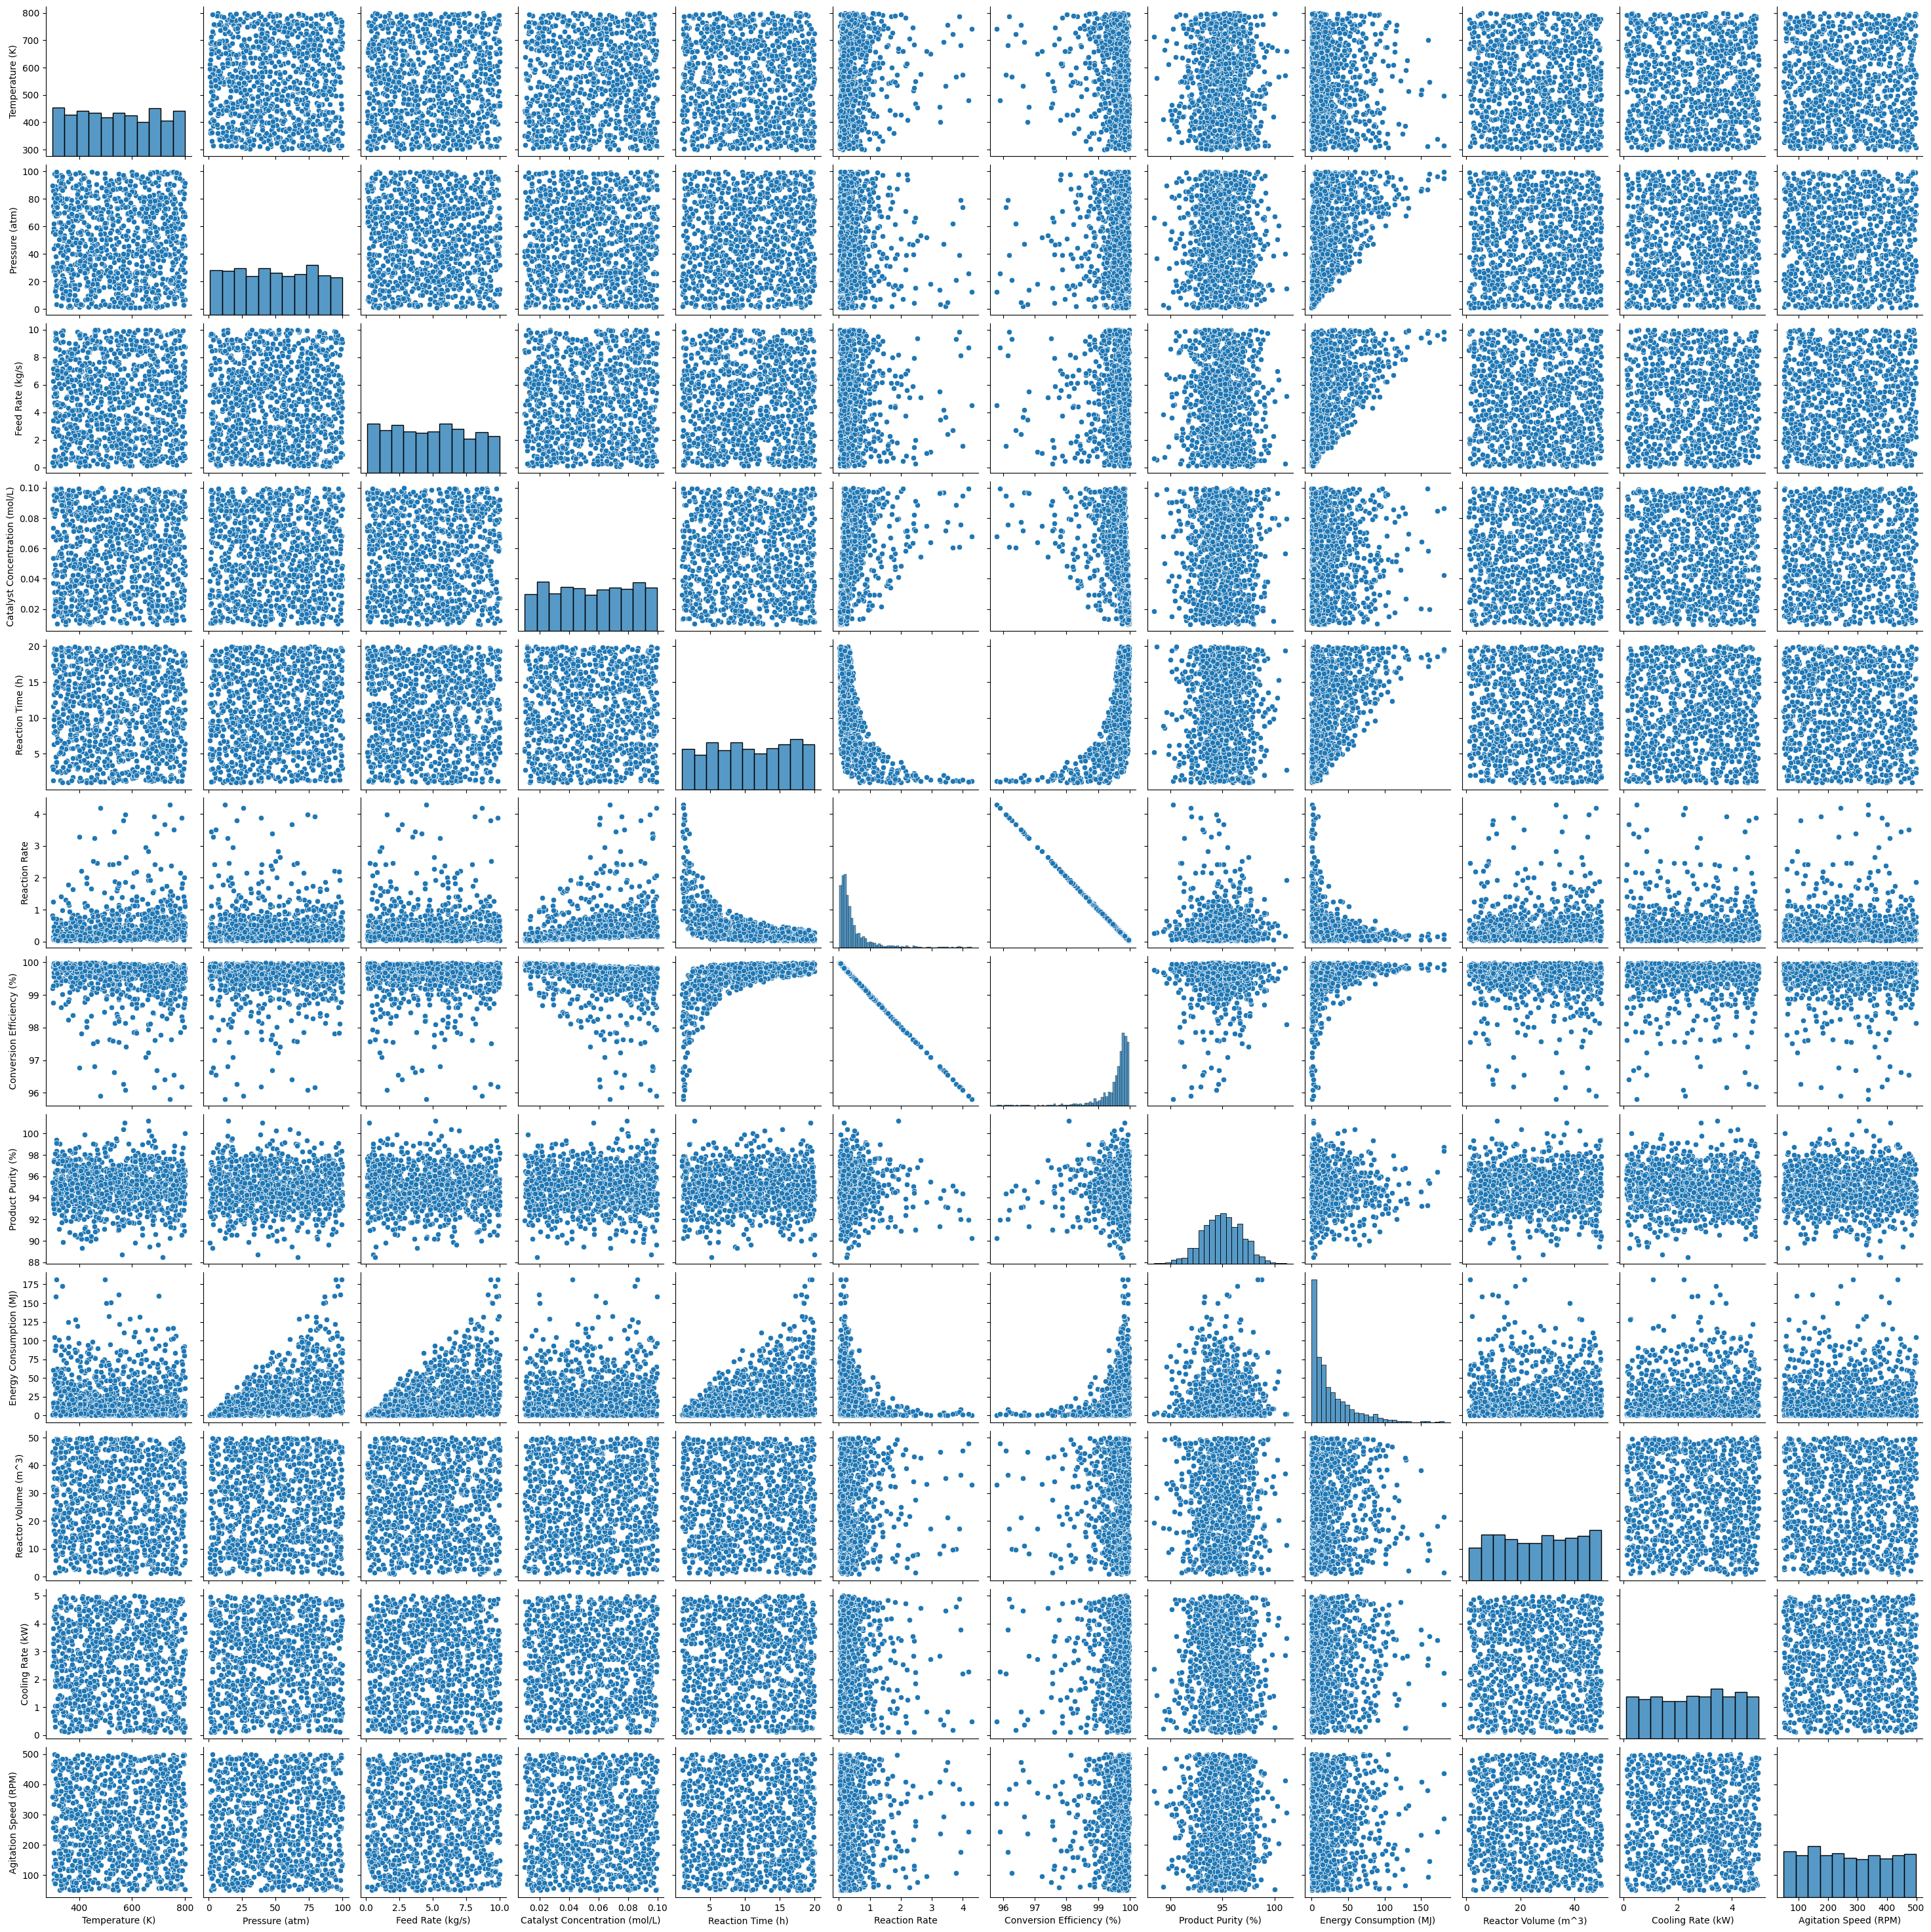

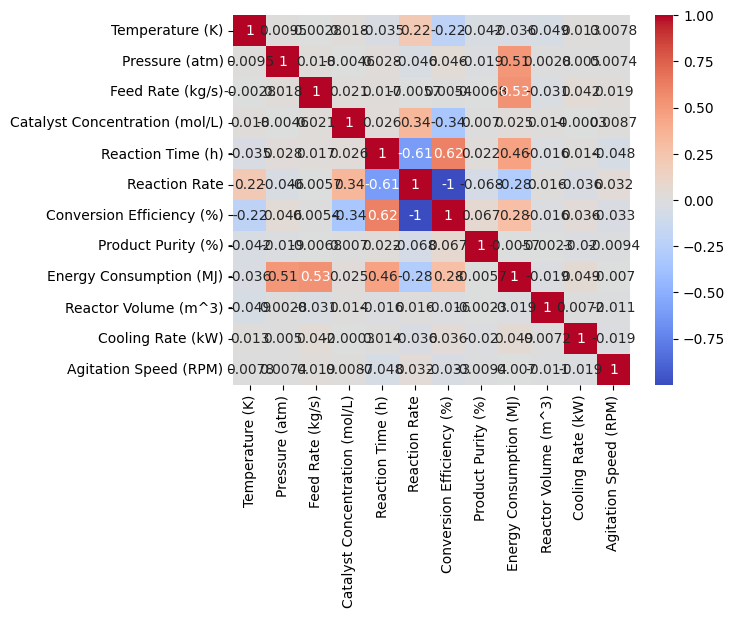

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Check dataset columns
print("Available columns in the dataset:", data.columns)

# Define the feature column names (update to match your dataset)
feature_columns = [
    'Temperature (K)', 'Pressure (atm)', 'Feed Rate (kg/s)', 
    'Catalyst Concentration (mol/L)', 'Reaction Time (h)', 
    'Cooling Rate (kW)', 'Agitation Speed (RPM)'
    # Remove 'Reactor Volume (m³)' if it's missing
]

# Ensure only features are passed to the scaler
features = data[feature_columns]

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=feature_columns)

# Verify the scaled data
scaled_data.head()


Available columns in the dataset: Index(['Temperature (K)', 'Pressure (atm)', 'Feed Rate (kg/s)',
       'Catalyst Concentration (mol/L)', 'Reaction Time (h)', 'Reaction Rate',
       'Conversion Efficiency (%)', 'Product Purity (%)',
       'Energy Consumption (MJ)', 'Reactor Volume (m^3)', 'Cooling Rate (kW)',
       'Agitation Speed (RPM)'],
      dtype='object')


Temperature (K)  Pressure (atm)  Feed Rate (kg/s)  \
0         0.877671        0.840876          0.526973   
1        -1.112538       -0.591071         -0.995003   
2        -0.038527       -0.777448         -1.549134   
3         0.841815        0.487316         -1.301098   
4         0.997511        0.730011         -1.580336   

   Catalyst Concentration (mol/L)  Reaction Time (h)  Cooling Rate (kW)  \
0                       -1.322144          -1.686733           0.482245   
1                       -1.134236          -1.307657           1.596718   
2                        0.644265          -0.627243           1.127575   
3                       -0.966866           1.566746           0.157375   
4                       -1.640723          -0.073743          -0.672082   

   Agitation Speed (RPM)  
0              -1.342898  
1              -0.537487  
2              -0.307337  
3              -0.462940  
4              -1.125821

In [6]:
from sklearn.model_selection import train_test_split

# Define target columns (update to match your dataset)
target_columns = ['Conversion Efficiency (%)', 'Product Purity (%)', 'Energy Consumption (MJ)']

# Separate the features (X) and targets (y)
X = scaled_data
y = data[target_columns]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")


Training and testing data prepared.


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Evaluation Metrics:\nMAE: {mae}\nMSE: {mse}\nR² Score: {r2}")


Evaluation Metrics:
MAE: 1.3767796228997893
MSE: 5.495121863255508
R² Score: 0.48511169820868133


In [9]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
import joblib

# Save the trained model
joblib.dump(model, 'reactor_performance_model.pkl')
print("Model saved.")


Model saved.


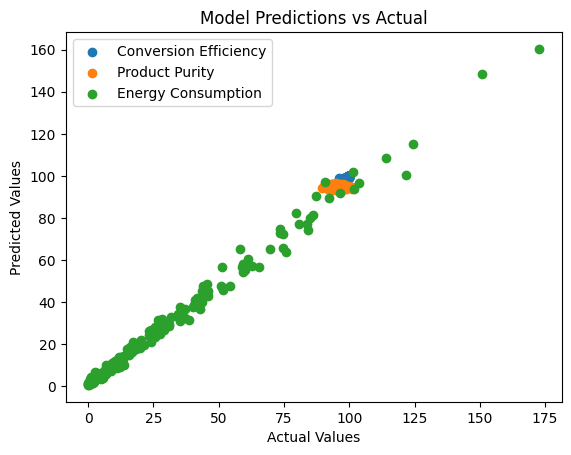

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test['Conversion Efficiency (%)'], y_pred[:, 0], label='Conversion Efficiency')
plt.scatter(y_test['Product Purity (%)'], y_pred[:, 1], label='Product Purity')
plt.scatter(y_test['Energy Consumption (MJ)'], y_pred[:, 2], label='Energy Consumption')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Model Predictions vs Actual")
plt.show()
